In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
%matplotlib inline

In [2]:
# rectangular matrix A:
A = np.array([[4, 1, 3],
              [8, 3, -2]])
# calculate the eigenvalues and eigenvectors of the symmetric matrix: (A^T)(A):
lam, v = LA.eig(A.T @ A)
print("lam=")
print(np.round(lam, 4))
print("v=")
print(np.round(v, 4))

lam=
[90.1167  0.     12.8833]
v=
[[ 0.9415  0.3228  0.0969]
 [ 0.3314 -0.9391 -0.0906]
 [-0.0617 -0.1174  0.9912]]


In [3]:
# construct the matrices Sigma and V:
V = v[:, lam.argsort()[::-1]]

lam_sorted = np.sort(lam)[::-1]
lam_sorted = lam_sorted[lam_sorted > 1e-8]
sigma = np.sqrt(lam_sorted)
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(sigma)

print("Sigma=")
print(np.round(Sigma, 4))
print("V=")
print(np.round(V, 4))

Sigma=
[[9.493  0.     0.    ]
 [0.     3.5893 0.    ]]
V=
[[ 0.9415  0.0969  0.3228]
 [ 0.3314 -0.0906 -0.9391]
 [-0.0617  0.9912 -0.1174]]


In [4]:
# construct the matrix U:
r = len(sigma)
U = A @ V[:,:r] / sigma
print("U=")
print(np.round(U, 4))

U=
[[ 0.4121  0.9111]
 [ 0.9111 -0.4121]]


In [5]:
# proof that we get back A if we multiply the matrices in the SVD:
result = U @ Sigma @ np.transpose(V)
print("A=")
print(A)
print("result=")
print(result)

A=
[[ 4  1  3]
 [ 8  3 -2]]
result=
[[ 4.  1.  3.]
 [ 8.  3. -2.]]


### what's wrong in the above proof?

In [6]:
# we need not do all this computation. SVD is already defined as a function for us:
U, s, VT = LA.svd(A)
print("U=")
print(np.round(U, 4))
print("sigma=")
print(np.round(s, 4))
print("V=")
print(np.round(VT.T, 4))

U=
[[-0.4121 -0.9111]
 [-0.9111  0.4121]]
sigma=
[9.493  3.5893]
V=
[[-0.9415 -0.0969 -0.3228]
 [-0.3314  0.0906  0.9391]
 [ 0.0617 -0.9912  0.1174]]


#### the SVD function call returns the U matrix in full, the transpose of the V matrix in full, but returns only the diagonal elements (singular values) of the Sigma matrix. We can construct the sigma matrix easily

In [7]:
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(s)
print("Sigma=")
print(Sigma)
# proof that we get back A:
A_reconstructed = U @ Sigma @ VT
print("Reconstructed A=")
print(A_reconstructed)

Sigma=
[[9.49298195 0.         0.        ]
 [0.         3.58933055 0.        ]]
Reconstructed A=
[[ 4.  1.  3.]
 [ 8.  3. -2.]]


# Application of SVD:

## 1. Dimensionality Reduction:

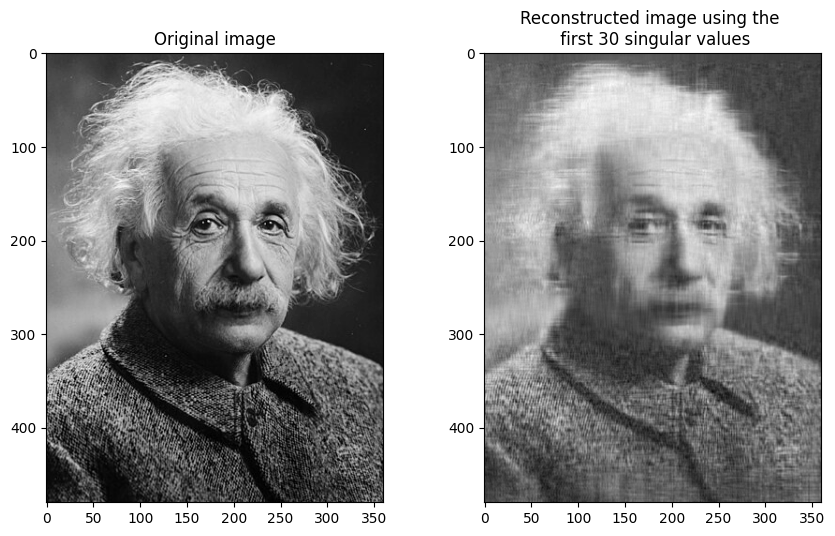

In [8]:
# loading an image of Albert Einstein, of size 360 by 480 pixels
# source: https://commons.wikimedia.org/wiki/File:Albert_Einstein_Head.jpg
mat = plt.imread("/Users/vinci/Documents/ML_AI_Sessions/Session3-14Jul2023/Albert_Einstein_Head_360_x_480.jpeg")

# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

# Reconstruction of the matrix using the first 30 singular values
k = 30
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k))
plt.show()

We need to store: 360 x 480 = 172800 values.
After SVD, each ui has 360 elements and each vi has 480 elements.
Choosing the first 30 (top 30) singular values, we need to keep only the top 30 𝜎i, ui, and vi ‘s respectively, resulting in a storage requirement of 30 x (1 + 360 + 480) = 25230 values.
This is a reduction by: (172800 - 25230)/ 127800 = 85.4%!!!


#### let us see what the matrices corresponding to the first 6 singular values look like:

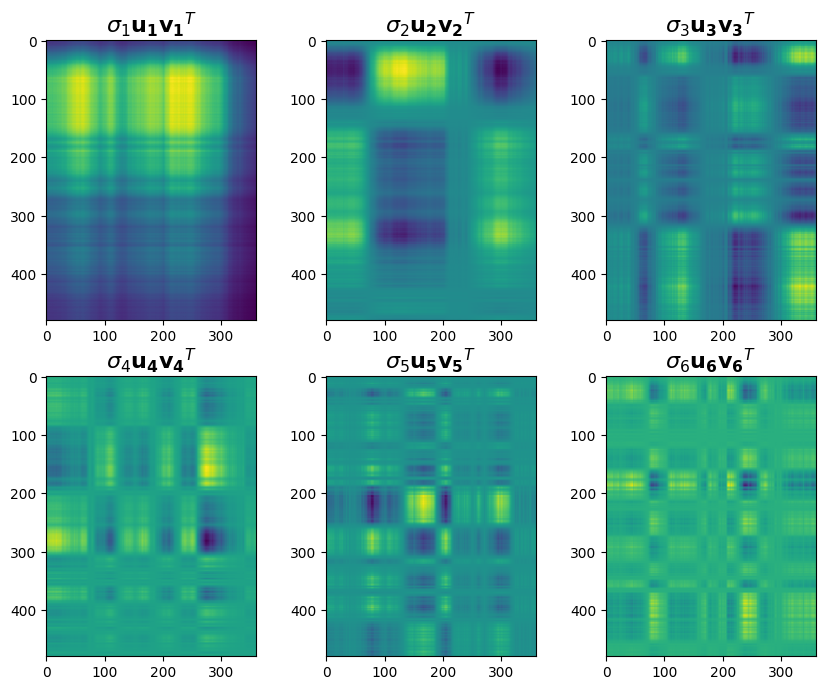

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

for i in range(0, 6):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), fontsize=16)
    
plt.show()

#### cannot make much sense of it; let's go for a simpler image:

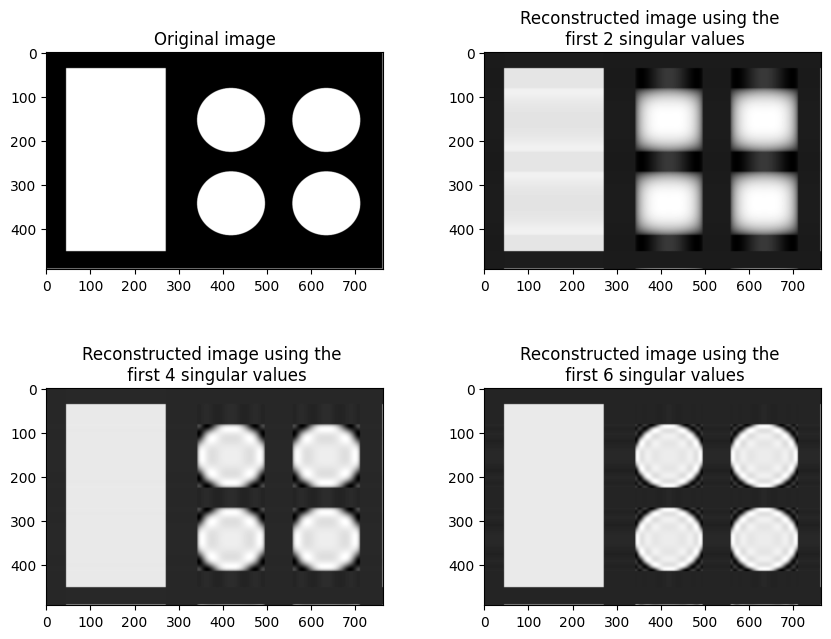

In [10]:
# loading a binary image of a bunch of shapes: original size: 764 by 492 pixels
# source: https://github.com/reza-bagheri/SVD_article/blob/master/pictures/shapes.png
mat = plt.imread("/Users/vinci/Documents/ML_AI_Sessions/Session3-14Jul2023/original_shapes_image.png")

# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes[0, 0].imshow(mat, cmap='gray')
axes[0, 0].set_title("Original image")

for i in range(1, 4):
    k = i * 2
    # Reconstruction of the matrix using the first k singular values
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

    axes[i // 2, i % 2].imshow(mat_approx, cmap='gray')
    axes[i // 2, i % 2].set_title("Reconstructed image using the \n first {} singular values".format(k))

plt.show()

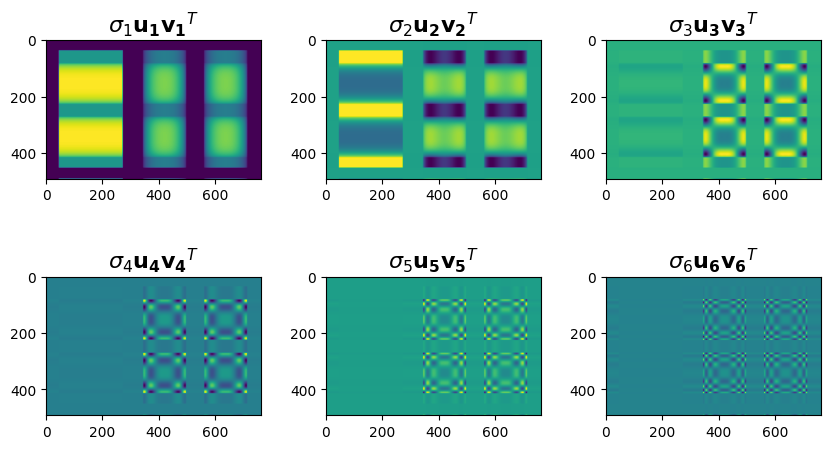

In [11]:
# let's see the first 6 matrices:
ig, axes = plt.subplots(2, 3, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.05)

for i in range(0, 6):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    #mat_i[mat_i < 1e-8] = 0
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), fontsize=16)
    
plt.show()

#### each of the above matrices is a rank 1 matrix: each matrix has only one linearly independent column, the rest of the columns are scalar multiples of that column. Each matrix captures some details of the original image. The first 2 matrices capture almost all the information of the rectangle. The first 2 matrices capture the 4 circles as rectangles, but as we go to the other matrices, we see more and more information captured, heading towards capturing them as circles.

#### a good example of the first rank 1 matrix of SVD capturing a lot of detail is shown below:

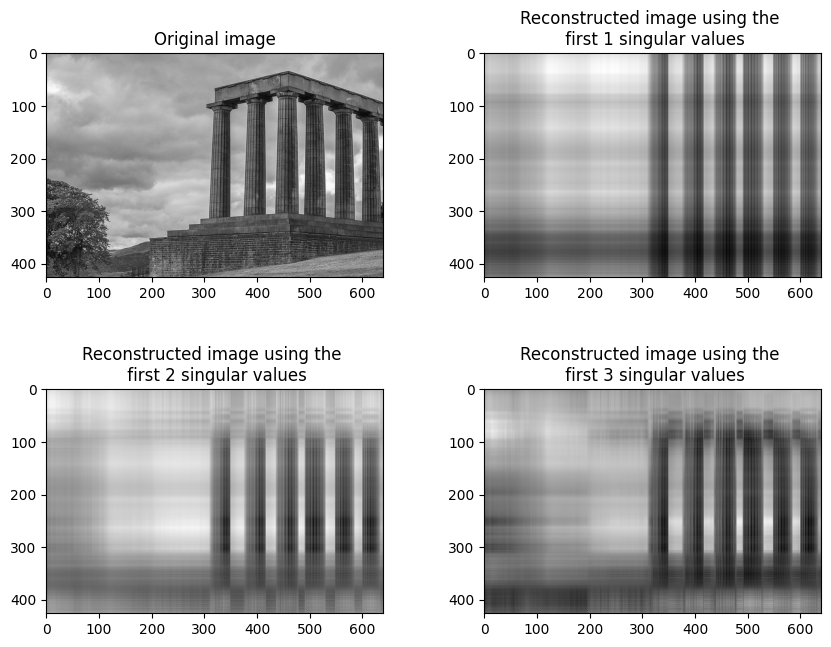

In [13]:
# loading a binary image of a monument in Scotland: original size: 640 by 426 pixels
# source: https://github.com/reza-bagheri/SVD_article/blob/master/pictures/monument.png
mat = plt.imread("/Users/vinci/Documents/ML_AI_Sessions/Session3-14Jul2023/monument.png")

# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes[0, 0].imshow(mat, cmap='gray')
axes[0, 0].set_title("Original image")

for i in range(1, 4):
    k = i
    # Reconstruction of the matrix using the first k singular values
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

    axes[i // 2, i % 2].imshow(mat_approx, cmap='gray')
    axes[i // 2, i % 2].set_title("Reconstructed image using the \n first {} singular values".format(k))

plt.show()

#### as seen above, the first matrix, corresponding to the first singular value, is able to capture the information that the original image has 6 pillars!

## 2. Eigenfaces

In this example, we are going to use the Olivetti faces dataset in the Scikit-learn library. This data set contains 400 images. The images were taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. The images show the face of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions, and facial details. These images are grayscale and each image has 64×64 pixels.

In [14]:
data = fetch_olivetti_faces()
imgs = data.images
print(imgs.shape)

(400, 64, 64)


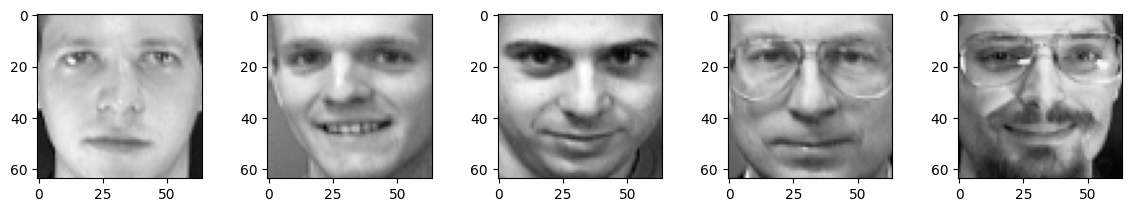

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(14, 8))
plt.subplots_adjust(wspace=0.4)

for i in range(0, 5):
    axes[i].imshow(imgs[i*40], cmap='gray')

plt.show()

In the previous example, we stored our original image in a matrix and then used SVD to decompose it. Here we take another approach. We know that we have 400 images, so we give each image a label from 1 to 400. Now we use one-hot encoding to represent these labels by a vector. We use a column vector with 400 elements. For each label k, all the elements are zero except the k-th element.

Now we store each image in a column vector. Each image has 64 × 64 = 4096 pixels. So we can flatten each image and place the pixel values into a column vector f with 4096 elements

So each image with label k will be stored in the vector fk, and we need 400 fk vectors to keep all the images. Now we define a transformation matrix M which transforms the label vector ik to its corresponding image vector fk. The vectors fk will be the columns of matrix M

This matrix has 4096 rows and 400 columns. We can simply use y=Mx to find the corresponding image of each label.

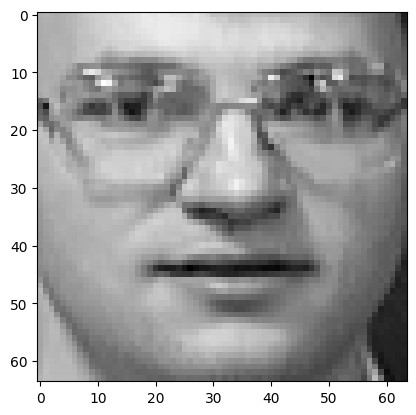

In [16]:
M = imgs.reshape((-1, imgs.shape[1]*imgs.shape[2])).T

x= np.zeros((400, 1))
x[50, 0] = 1
y = M @ x
plt.imshow(y.reshape((64,64)), cmap='gray')
plt.show()

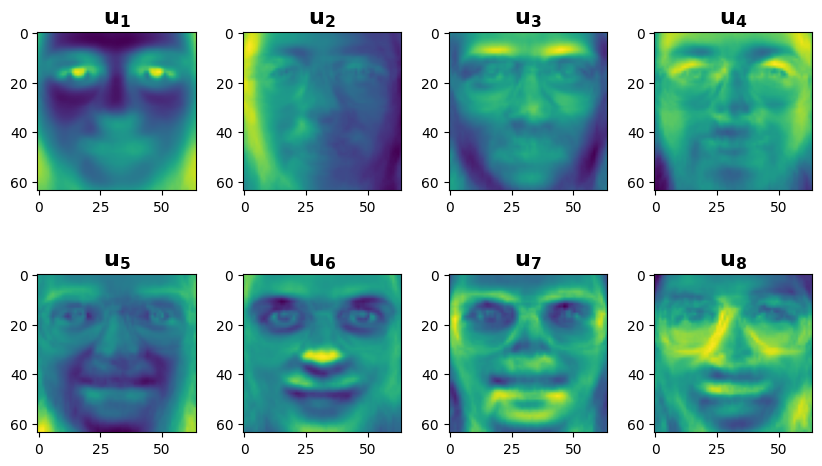

In [17]:
# SVD on matrix M:
U, s, VT = LA.svd(M)

fig, axes = plt.subplots(2, 4, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.1)

for i in range(0, 8):
    axes[i // 4, i % 4].imshow(U[:, i].reshape((64,64)))
    axes[i // 4, i % 4].set_title("$\mathbf{{u_{0}}}$".format(i+1), fontsize=16)
    
plt.show()

Reconstructing one of the images using the basis vectors:

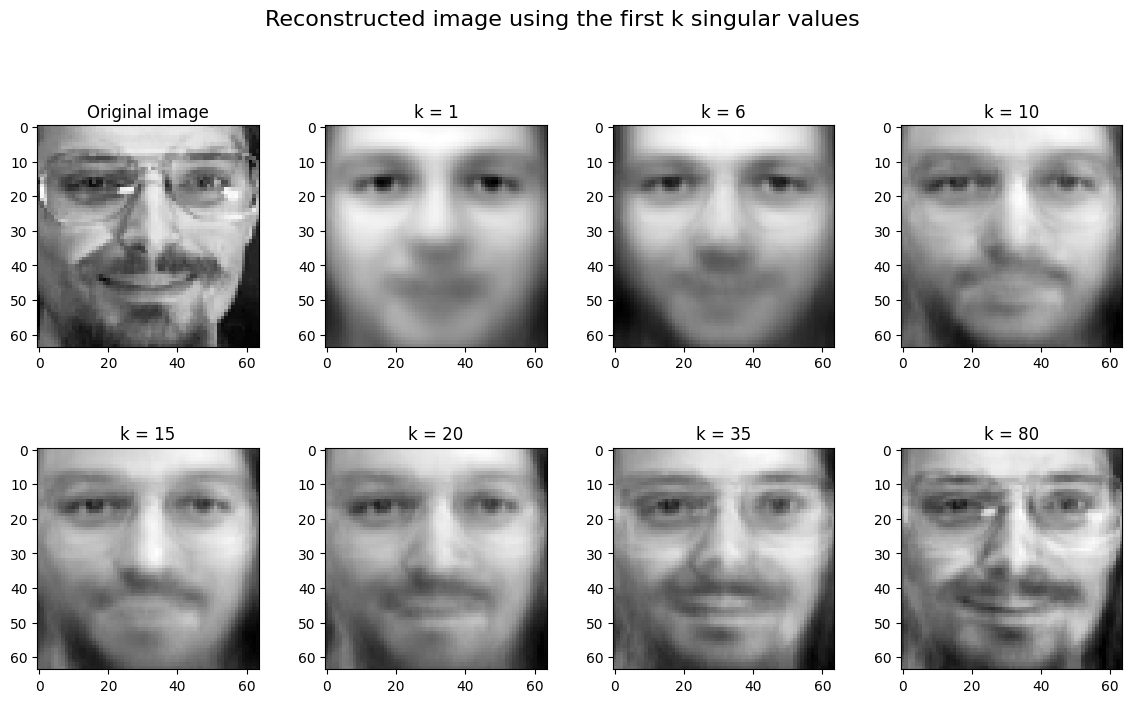

In [18]:
x= np.zeros((400, 1))
x[160, 0] = 1
Sigma = np.zeros((M.shape[0], M.shape[1]))
Sigma[:min(M.shape[0], M.shape[1]), :min(M.shape[0], M.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 4, figsize=(14, 8))
fig.suptitle("Reconstructed image using the first k singular values", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.1)

axes[0, 0].imshow(imgs[160], cmap='gray')
axes[0, 0].set_title("Original image")

k_list = [1, 6, 10, 15, 20, 35, 80]
for i in range(1, 8):
    # Reconstruction of the matrix using the first k singular values
    k = k_list[i-1] 
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :] @ x

    axes[i // 4, i % 4].imshow(mat_approx.reshape((64,64)), cmap='gray')
    axes[i // 4, i % 4].set_title("k = {}".format(k))

plt.show()

The vectors ui are called the Eigenfaces and can be used for facial recognition

## 3. Noise Reduction

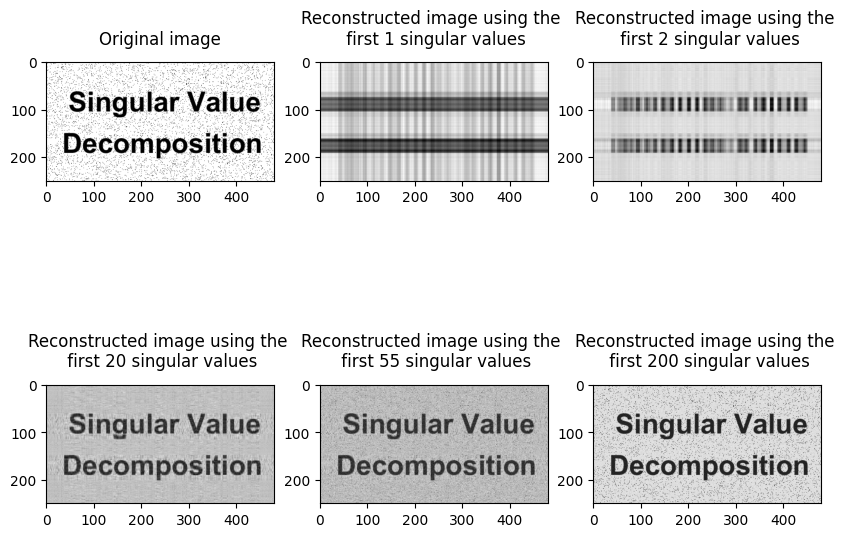

In [19]:
# loading an image having some noise: original size: 480 by 250 pixels 
# source: https://github.com/reza-bagheri/SVD_article/blob/master/pictures/text.png
mat = plt.imread("/Users/vinci/Documents/ML_AI_Sessions/Session3-14Jul2023/original_text_image_without_noise.png")

# Adding noise
noise = np.random.rand(mat.shape[0], mat.shape[1])
mat[noise > 0.95] = 0

# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 3, figsize=(10,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)

axes[0, 0].imshow(mat, cmap='gray')
axes[0, 0].set_title("Original image", y=1.08)

k_list = [1, 2, 20, 55, 200]
for i in range(1, 6):
    k = k_list[i-1]
    mat_rank_k = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]
    axes[i // 3, i % 3].imshow(mat_rank_k, cmap='gray')
    axes[i // 3, i % 3].set_title("Reconstructed image using the \n first {} singular values".format(k), y=1.08)

plt.show()


#### the original text image had no noise; we added noise to it and then processed the SVD. As seen here, the amount of noise increases as we increase the choice of singular values (rank of the reconstructed matrix). So if we use a lower rank like 20 we can significantly reduce the noise in the image. 